In [54]:
# importing utility modules
import pandas as pd
from sklearn.metrics import mean_squared_error

# importing machine learning models for prediction
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
# importing train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn import  model_selection
from time import time
from time import time
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [55]:
Test_other_useful=pd.read_csv('Test_Other.csv')
Test_other=Test_other_useful[['read_ease','polarity','subjectivity','Adj_ratio','review_count','NumElite','NumofWords']]
Test_y =Test_other_useful['useful_level']

In [56]:
Test_tfidf=pd.read_csv('Test_tfidf.csv')

In [57]:
Train_other_useful=pd.read_csv('Train_Other.csv')

In [58]:
Train_other_useful

,useful_level,read_ease,polarity,subjectivity,Adj_ratio,review_count,NumElite,NumofWords
0,2,66.94,0.490000,0.570000,0.279070,990,4,78
1,2,73.17,0.035069,0.480903,0.189655,11,0,121
2,1,-220.51,0.038167,0.523611,0.203947,17,0,296
3,0,72.53,0.382812,0.525000,0.000000,32,0,29
4,2,64.54,-0.070604,0.514312,0.204444,223,4,872
...,...,...,...,...,...,...,...,...
49663,0,-7.36,0.225208,0.628750,0.306122,1664,10,86
49664,1,-42.04,0.065707,0.394949,0.211864,45,0,257
49665,1,85.39,0.101389,0.673611,0.275862,1,0,45
49666,2,57.27,-0.022470,0.530952,0.162162,1,0,78


In [59]:
Test_other_useful

,useful_level,read_ease,polarity,subjectivity,Adj_ratio,review_count,NumElite,NumofWords
0,1,68.70,0.063561,0.234590,0.238806,6,0,292
1,0,87.21,0.354762,0.578571,0.388889,113,0,38
2,0,55.20,0.500000,1.000000,0.307692,5,0,23
3,1,48.81,-0.300000,0.533333,0.250000,37,0,39
4,1,72.16,-0.325000,0.628472,0.155556,24,0,83
...,...,...,...,...,...,...,...,...
5514,1,77.27,0.326190,0.692857,0.193548,2,0,58
5515,1,81.83,0.213413,0.485855,0.272727,845,4,163
5516,0,63.32,-0.185714,0.548810,0.135135,6,0,76
5517,1,66.57,0.093168,0.477743,0.211765,1989,13,281


In [60]:
Train_other=Train_other_useful[['read_ease','polarity','subjectivity','Adj_ratio','review_count','NumElite','NumofWords']]

In [61]:
Train_other

,read_ease,polarity,subjectivity,Adj_ratio,review_count,NumElite,NumofWords
0,66.94,0.490000,0.570000,0.279070,990,4,78
1,73.17,0.035069,0.480903,0.189655,11,0,121
2,-220.51,0.038167,0.523611,0.203947,17,0,296
3,72.53,0.382812,0.525000,0.000000,32,0,29
4,64.54,-0.070604,0.514312,0.204444,223,4,872
...,...,...,...,...,...,...,...
49663,-7.36,0.225208,0.628750,0.306122,1664,10,86
49664,-42.04,0.065707,0.394949,0.211864,45,0,257
49665,85.39,0.101389,0.673611,0.275862,1,0,45
49666,57.27,-0.022470,0.530952,0.162162,1,0,78


In [62]:
Train_y =Train_other_useful['useful_level']

In [63]:
Train_y

0        2
1        2
2        1
3        0
4        2
        ..
49663    0
49664    1
49665    1
49666    2
49667    0
Name: useful_level, Length: 49668, dtype: int64

In [64]:
Train_tfidfl=pd.read_csv('Train_TFIDF.csv')


In [65]:
Train_tfidf = Train_tfidfl.drop(['useful_level','read_ease','polarity','subjectivity','Adj_ratio','review_count','NumElite','NumofWords'], axis=1)

In [66]:
Train_tfidf

,amazing,atmosphere,call,company,food,great,told,see,review,delicious,...,harry,exhibit,aquarium,spanish,tsa,plaza,crystal,stocked,alex,shopped
0,0.000000,0.000000,0.000000,0.0,0.000000,0.131141,0.00000,0.0,0.000000,0.19133,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.080481,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.395245,0.000000,0.000000,0.0,0.260046,0.000000,0.00000,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.040188,0.000000,0.0,0.000000,0.000000,0.06079,0.0,0.412415,0.00000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49663,0.000000,0.000000,0.000000,0.0,0.075499,0.000000,0.00000,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.264459,0.0,0.0,0.0,0.0,0.0
49664,0.000000,0.000000,0.000000,0.0,0.000000,0.035393,0.00000,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
49665,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
49666,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [67]:
NTrain_tfidf, Val_tfidf,NTrain_other,Val_other,NTrain_y,Val_y = model_selection.train_test_split(Train_tfidf, Train_other ,Train_y, test_size=0.2,stratify=Train_y)

In [68]:
NTrain_tfidf

,amazing,atmosphere,call,company,food,great,told,see,review,delicious,...,harry,exhibit,aquarium,spanish,tsa,plaza,crystal,stocked,alex,shopped
49216,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088089,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7783,0.00000,0.000000,0.065903,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8220,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080910,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32298,0.00000,0.000000,0.035404,0.000000,0.000000,0.000000,0.064313,0.000000,0.062331,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41865,0.00000,0.000000,0.138100,0.309757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,0.00000,0.000000,0.000000,0.000000,0.097834,0.000000,0.000000,0.000000,0.000000,0.142025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28355,0.07583,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40856,0.00000,0.000000,0.000000,0.000000,0.125197,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12051,0.00000,0.000000,0.000000,0.000000,0.000000,0.027714,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
from time import time
t0 = time()
import xgboost 
# initializing all the base model objects with default parameters
model_1 = LogisticRegression()
model_2 = xgboost.XGBClassifier()
model_3 = GaussianNB()
model_4 = RandomForestClassifier()
model_5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

# training all the model on the train dataset

# tfidf
model_1.fit(NTrain_tfidf, NTrain_y)
val_pred_1 = model_1.predict(Val_tfidf)
test_pred_1 = model_1.predict(Test_tfidf)

# converting to dataframe
val_pred_1 = pd.DataFrame(val_pred_1)
test_pred_1 = pd.DataFrame(test_pred_1)

# other
model_2.fit(NTrain_other, NTrain_y)
val_pred_2 = model_2.predict(Val_other)
test_pred_2 = model_2.predict(Test_other)

# converting to dataframe
val_pred_2 = pd.DataFrame(val_pred_2)
test_pred_2 = pd.DataFrame(test_pred_2)

# # training third model
# model_3.fit(x_train, y_train)
# val_pred_3 = model_1.predict(x_val)
# test_pred_3 = model_1.predict(x_test)

# # converting to dataframe
# val_pred_3 = pd.DataFrame(val_pred_3)
# test_pred_3 = pd.DataFrame(test_pred_3)

# concatenating validation dataset along with all the predicted validation data (meta features)

print(time() - t0)

/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:28:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
17.583606719970703


In [70]:
Val_tfidf['new_col'] = range(1, len(Val_tfidf) + 1)
Val_other['new_col'] = range(1, len(Val_other) + 1)
val_pred_1['new_col'] = range(1, len(val_pred_1) + 1)
val_pred_2['new_col'] = range(1, len(val_pred_2) + 1)
Test_tfidf['new_col'] = range(1, len(Test_tfidf) + 1)
Test_other['new_col'] = range(1, len(Test_other) + 1)
test_pred_1['new_col'] = range(1, len(test_pred_1) + 1)
test_pred_2['new_col'] = range(1, len(test_pred_2) + 1)

<ipython-input-70-399c54ff95c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Val_tfidf['new_col'] = range(1, len(Val_tfidf) + 1)
<ipython-input-70-399c54ff95c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Val_other['new_col'] = range(1, len(Val_other) + 1)


In [71]:
val_pred_1

,0,new_col
0,1,1
1,0,2
2,0,3
3,1,4
4,2,5
...,...,...
9929,0,9930
9930,1,9931
9931,1,9932
9932,0,9933


In [72]:
df_val1 = Val_tfidf.merge(Val_other, on='new_col')
df_val2 = df_val1.merge(val_pred_1, on='new_col')
df_val3 = df_val2.merge(val_pred_2, on='new_col')
df_test1 = Test_tfidf.merge(Test_other, on='new_col')
df_test2 = df_test1.merge(test_pred_1, on='new_col')
df_test3 = df_test2.merge(test_pred_2, on='new_col')

In [73]:
df_val=df_val3.drop(['new_col'], axis=1)
df_test=df_test3.drop(['new_col'], axis=1)

In [74]:
df_val

,amazing,atmosphere,call,company,food,great,told,see,review,delicious,...,shopped,read_ease,polarity,subjectivity,Adj_ratio,review_count,NumElite,NumofWords,0_x,0_y
0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,52.53,0.214815,0.518519,0.104651,5,0,162,1,0
1,0.0,0.0,0.000000,0.0,0.188910,0.000000,0.0,0.000000,0.0,0.0,...,0.0,33.08,0.216097,0.498980,0.228070,101,3,109,0,0
2,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,57.27,0.662500,0.675000,0.375000,38,0,14,0,0
3,0.0,0.0,0.000000,0.0,0.000000,0.063864,0.0,0.000000,0.0,0.0,...,0.0,73.00,0.235462,0.490133,0.208791,62,0,188,1,0
4,0.0,0.0,0.128385,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,79.80,-0.120000,0.450000,0.113636,51,0,101,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9929,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,58.11,0.143750,0.662500,0.240000,1290,6,86,0,1
9930,0.0,0.0,0.000000,0.0,0.213879,0.000000,0.0,0.070849,0.0,0.0,...,0.0,78.18,0.148941,0.492744,0.182540,348,7,258,1,2
9931,0.0,0.0,0.000000,0.0,0.223915,0.000000,0.0,0.000000,0.0,0.0,...,0.0,-76.72,0.053247,0.389610,0.151899,924,7,171,1,1
9932,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,63.87,0.435985,0.646801,0.263158,11,0,65,0,0


In [75]:
# making the final model using the meta features
final_model = LogisticRegression()
final_model.fit(df_val, Val_y)

# getting the final output
final_pred = final_model.predict(df_test)
final_pred_Prob = final_model.predict_proba(df_test)
#printing the root mean squared error between real value and predicted value
print(mean_squared_error(Test_y, final_pred))
print(f1_score(Test_y, final_pred, average='micro'))
print(f1_score(Test_y, final_pred, average='macro'))

0.5584344990034427
0.6508425439391194
0.6145573744378213


/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn import metrics

In [77]:
accuracy = metrics.accuracy_score(Test_y, final_pred)
auc = metrics.roc_auc_score(Test_y, final_pred_Prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(Test_y, final_pred))

Accuracy: 0.65
Auc: 0.82
Detail:
              precision    recall  f1-score   support

           0       0.74      0.86      0.79      2405
           1       0.58      0.46      0.52      1776
           2       0.53      0.53      0.53      1338

    accuracy                           0.65      5519
   macro avg       0.62      0.62      0.61      5519
weighted avg       0.64      0.65      0.64      5519



Training Time: 2.9087066650390625e-05

Validation Set

Accuracy: 0.65
Auc: 0.82
Macros:
F1 Score: 0.6145573744378213
Precision: 0.6195335580708216
Recall: 0.6170204181414943
Micros:
F1 Score: 0.6508425439391194
Precision: 0.6508425439391194
Recall: 0.6508425439391194
Detail Report:
              precision    recall  f1-score   support

           0       0.74      0.86      0.79      2405
           1       0.58      0.46      0.52      1776
           2       0.53      0.53      0.53      1338

    accuracy                           0.65      5519
   macro avg       0.62      0.62      0.61      5519
weighted avg       0.64      0.65      0.64      5519



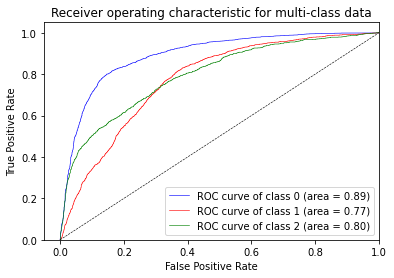

In [78]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import itertools
import matplotlib.pyplot as plt
t0 = time()
    ## test
#     predicted = model1.predict(NewXValid)
#     predicted_prob = model1.predict_proba(NewXValid)
print('Training Time:', time() - t0)
print('')
accuracy = metrics.accuracy_score(Test_y, final_pred)
auc = metrics.roc_auc_score(Test_y, final_pred_Prob, 
                                multi_class="ovr")
print('\033[1m' + 'Validation Set')
print('\033[0m')
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print('Macros:')
print("F1 Score:", f1_score(Test_y, final_pred, average='macro'))
print("Precision:", precision_score(Test_y, final_pred, average='macro'))
print("Recall:", recall_score(Test_y, final_pred, average='macro'))
print('Micros:')
print("F1 Score:", f1_score(Test_y, final_pred, average='micro'))
print("Precision:", precision_score(Test_y, final_pred, average='micro'))
print("Recall:", recall_score(Test_y, final_pred, average='micro'))


print("Detail Report:")
print(metrics.classification_report(Test_y, final_pred))

#     predicted = model1.predict(NewXtest)
#     predicted_prob = model1.predict_proba(NewXtest)
#     accuracy = metrics.accuracy_score(y_test, predicted)
#     auc = metrics.roc_auc_score(y_test, predicted_prob, 
#                                 multi_class="ovr")
#     print('\033[1m' + 'Test Set')
#     print('\033[0m')
#     print("Accuracy:",  round(accuracy,2))
#     print("Auc:", round(auc,2))
#     print('Macros:')
#     print("F1 Score:", f1_score(y_test, predicted, average='macro'))
#     print("Precision:", precision_score(y_test, predicted, average='macro'))
#     print("Recall:", recall_score(y_test, predicted, average='macro'))
#     print('Micros:')
#     print("F1 Score:", f1_score(y_test, predicted, average='micro'))
#     print("Precision:", precision_score(y_test, predicted, average='micro'))
#     print("Recall:", recall_score(y_test, predicted, average='micro'))

#     print("Detail Report:")
#     print(metrics.classification_report(y_test, predicted))
    
y_test1 = label_binarize(Test_y, classes=[0, 1, 2])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test1[:, i], final_pred_Prob[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
colors = itertools.cycle(['blue', 'red', 'green'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=0.6,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=0.6)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model_evaluation(model1=LogisticRegression(max_iter = 1000))

1:model1 model2 0.5857
2:model1 model3 0.5910
3:model2 model3 0.6112
4: